## simple introudction : 
   
* this data consist from 2 files :
       
   * first file for critica reviews.
   * second file for user reviews.  
   
*  my Analysis  project consist :

* i will make som Data Explantory , Data Analysis , data visualization  , data preparing additional to datacleaning  


##  About Dataset (file : user_reviews.csv ) :

  * This dataset are published on a kaggel .

  * This Dataset Need for clean .

## features :

   * movieId : show the id for every movie .
   
   * rating : describe rate of showing the movie .
   
   * quote : describe from where the idea of film come .
   
   * reviewId : describe about the id of reviwed .
   
   * isVerified : take boolean value (yes / no) .
   
   * isSuperReviewer : 	take boolean value (yes / no) .
   
   * hasSpoilers  : take boolean value (yes / no) .
   
   * score : score of film .
   
   * creationDate : describe when the film created .

   *  userDisplayName : Name of display film .
   
   *  userRealm : may be    RT or Flixster or  Fandango (Target) .
   
   *  userId : identies every user .

                                      
##                                --->>  . if you found my Notebook useful dont forget to upvote me  <<---   

In [1]:
#import the necessary libararies:

# imports :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay



In [2]:
# load the data:

data1=pd.read_csv("user_reviews.csv")


In [3]:
data1.head(25)

,movieId,rating,quote,reviewId,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userDisplayName,userRealm,userId
0,13905397-4673-3e05-954d-8840645bebc2,1.0,"Did.Not.Like.\n\nThis movie was boring, overse...",NaN,False,False,False,False,1.0,2001-03-07,NaN,RT,901245019
1,13905397-4673-3e05-954d-8840645bebc2,4.5,[font=Arial]i never read the original story. ...,NaN,False,False,False,False,4.5,2002-03-08,NaN,RT,901245679
2,a2b255da-eb4d-3436-804b-fbe7b8732097,3.5,[left][b][font=Book Antiqua]xxxxx[/font][/b][/...,NaN,False,False,False,False,3.5,2002-09-03,NaN,RT,900608936
3,94a040f3-e1db-33b0-b7aa-6187e1406d21,2.0,"Art films can't center around gigantic, green ...",NaN,False,False,False,False,2.0,2003-01-21,NaN,RT,900592542
4,df35d67b-c89e-30fa-bff5-c31006cc6ae4,3.5,"dude, X-men 2 rocks! better then the first one...",NaN,False,False,False,False,3.5,2003-05-02,NaN,RT,900659519
5,df35d67b-c89e-30fa-bff5-c31006cc6ae4,3.0,"Of the movie, I do not approve.\n\nI don't kno...",NaN,False,False,False,False,3.0,2003-05-11,NaN,RT,900925724
6,df35d67b-c89e-30fa-bff5-c31006cc6ae4,4.0,[font=Trebuchet MS][size=-1] The sequel which ...,NaN,False,False,False,False,4.0,2003-08-11,NaN,RT,900728626
7,7736ffbf-e66b-3d05-b9a7-72d7286f8c09,3.5,"[i]Excerpt from [/i][url=""http://www.smart-pop...",NaN,False,False,False,False,3.5,2003-10-11,NaN,RT,900778788
8,94a040f3-e1db-33b0-b7aa-6187e1406d21,3.0,[left][b][font=Book Antiqua]xxxxx[/font][/b][/...,NaN,False,False,False,False,3.0,2003-10-28,NaN,RT,900608936
9,df35d67b-c89e-30fa-bff5-c31006cc6ae4,5.0,"****/**** awsome action, nightcrawlers attack ...",NaN,False,False,False,False,5.0,2003-10-30,NaN,RT,900612371


## Analysis :

In [4]:
# to  know some info about dataset 1 :

print(data1.info())

print("-"*50)

print("shape of dtataset : {}".format(np.shape(data1)))

print ("-"*50)

print(f"Types of dataset : \n  {data1.dtypes}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224583 entries, 0 to 2224582
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   movieId          object 
 1   rating           float64
 2   quote            object 
 3   reviewId         object 
 4   isVerified       bool   
 5   isSuperReviewer  bool   
 6   hasSpoilers      bool   
 7   hasProfanity     bool   
 8   score            float64
 9   creationDate     object 
 10  userDisplayName  object 
 11  userRealm        object 
 12  userId           object 
dtypes: bool(4), float64(2), object(7)
memory usage: 161.2+ MB
None
--------------------------------------------------
shape of dtataset : (2224583, 13)
--------------------------------------------------
Types of dataset : 
  movieId             object
rating             float64
quote               object
reviewId            object
isVerified            bool
isSuperReviewer       bool
hasSpoilers           bool
hasProfanity          

In [5]:
# to know some statistical info about Numerical data : :

print(data1.describe().T)




            count      mean       std  min  25%  50%  75%  max
rating  2224583.0  3.807733  1.196687  0.5  3.0  4.0  5.0  5.0
score   2224583.0  3.807733  1.196687  0.5  3.0  4.0  5.0  5.0


In [6]:
# to know some statistical info about Categorical data :

print(data1.describe(include="O"))

                                     movieId                   quote  \
count                                2224583                 2224583   
unique                                   100                 2135343   
top     85a99b8b-4724-38b6-a5d0-23c0161a3ce5  could have been better   
freq                                  262330                     427   

                                    reviewId creationDate userDisplayName  \
count                                 875198      2224583          168752   
unique                                875198         7320           67732   
top     35b68a24-6fcf-4fc6-9cec-7ef3e2db3106   2007-06-06          Google   
freq                                       1        21974             891   

       userRealm                                userId  
count    2224583                               2224583  
unique         3                               1359898  
top           RT  20f97638-9460-4b49-a86c-4f730c64ca60  
freq     2111932         

In [7]:
# to get evey count of item  in feature :

for col in data1.columns:
    c=data1[col].value_counts()
    print(c)
    print("-"*50)
    print(f"Number of counts -->> \n {len(c)}")
    print("-"*50)

movieId
85a99b8b-4724-38b6-a5d0-23c0161a3ce5    262330
9ddacc49-1918-3722-b5d9-4a1fa6b9b2a3    240850
b2edf9af-70bb-3795-bff0-8867843b4925    191952
6263201f-baf8-3312-a482-f8dec3edd662    137493
41ca006b-8820-379c-84fc-aaae870b37f6     83099
                                         ...  
e53e6850-82b5-3727-a768-d99df185a901       380
be2237d2-7919-3bfb-a190-1a69f9dca460       296
0607e8c6-88a2-34f4-9d0b-dc5cdd560dfe       113
99d1aa42-8232-3217-b3bd-f8b7b3640740        84
4f15afc8-8852-3a4e-8285-1aac469e7a72        22
Name: count, Length: 100, dtype: int64
--------------------------------------------------
Number of counts -->> 
 100
--------------------------------------------------
rating
5.0    680511
4.0    398229
4.5    268320
3.5    261552
3.0    235557
2.5    115914
2.0     97995
0.5     62763
1.0     54332
1.5     49410
Name: count, dtype: int64
--------------------------------------------------
Number of counts -->> 
 10
--------------------------------------------------
quot

## Data cleaning :

In [8]:
# check the null values :
# ther null values in userDisplayName , reviewId
data1.isna().mean()

movieId            0.000000
rating             0.000000
quote              0.000000
reviewId           0.606579
isVerified         0.000000
isSuperReviewer    0.000000
hasSpoilers        0.000000
hasProfanity       0.000000
score              0.000000
creationDate       0.000000
userDisplayName    0.924142
userRealm          0.000000
userId             0.000000
dtype: float64

In [10]:
# in Datascience : ther are Role say if percentage of null values in any feature in dataset increase about 25% Drop it:
# movieId feature  is not important as dataset will not affecting with dropping it   : 
#clean dataset :

clean=data1.drop(columns=["userDisplayName","reviewId","movieId"],axis=1,inplace=True)
data1

,rating,quote,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userRealm,userId
0,1.0,"Did.Not.Like.\n\nThis movie was boring, overse...",False,False,False,False,1.0,2001-03-07,RT,901245019
1,4.5,[font=Arial]i never read the original story. ...,False,False,False,False,4.5,2002-03-08,RT,901245679
2,3.5,[left][b][font=Book Antiqua]xxxxx[/font][/b][/...,False,False,False,False,3.5,2002-09-03,RT,900608936
3,2.0,"Art films can't center around gigantic, green ...",False,False,False,False,2.0,2003-01-21,RT,900592542
4,3.5,"dude, X-men 2 rocks! better then the first one...",False,False,False,False,3.5,2003-05-02,RT,900659519
...,...,...,...,...,...,...,...,...,...,...
2224578,5.0,It was perfect. PERFECT. Down to the last minu...,False,False,False,False,5.0,2024-06-28,RT,78f232cd-0f32-4644-92ad-ab018ef50657
2224579,4.5,Despite it being 4 hours long I found it to be...,False,False,False,False,4.5,2024-06-28,RT,b62e4265-2fa7-4be9-8300-5cba13f198cd
2224580,3.0,Not enough set piece action and a cerebral typ...,False,False,False,False,3.0,2024-06-28,RT,e037cb28-9c15-4a9e-9a27-22c6f3dacaa4
2224581,5.0,"This film is really cool, it shows other power...",False,False,False,False,5.0,2024-06-28,RT,614186b8-53a4-467c-b647-25a08b3d7fe7


In [12]:
# check the duplicate values & Remove it if found any :

#found there duplicated values:


df=data1
duplicated=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated)

#duplicated_features:

duplicated_features=df.duplicated()

# Drop the duplicated values:

data1.drop_duplicates()

Number of duplicates ----->>>  1223


,rating,quote,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userRealm,userId
0,1.0,"Did.Not.Like.\n\nThis movie was boring, overse...",False,False,False,False,1.0,2001-03-07,RT,901245019
1,4.5,[font=Arial]i never read the original story. ...,False,False,False,False,4.5,2002-03-08,RT,901245679
2,3.5,[left][b][font=Book Antiqua]xxxxx[/font][/b][/...,False,False,False,False,3.5,2002-09-03,RT,900608936
3,2.0,"Art films can't center around gigantic, green ...",False,False,False,False,2.0,2003-01-21,RT,900592542
4,3.5,"dude, X-men 2 rocks! better then the first one...",False,False,False,False,3.5,2003-05-02,RT,900659519
...,...,...,...,...,...,...,...,...,...,...
2224578,5.0,It was perfect. PERFECT. Down to the last minu...,False,False,False,False,5.0,2024-06-28,RT,78f232cd-0f32-4644-92ad-ab018ef50657
2224579,4.5,Despite it being 4 hours long I found it to be...,False,False,False,False,4.5,2024-06-28,RT,b62e4265-2fa7-4be9-8300-5cba13f198cd
2224580,3.0,Not enough set piece action and a cerebral typ...,False,False,False,False,3.0,2024-06-28,RT,e037cb28-9c15-4a9e-9a27-22c6f3dacaa4
2224581,5.0,"This film is really cool, it shows other power...",False,False,False,False,5.0,2024-06-28,RT,614186b8-53a4-467c-b647-25a08b3d7fe7


In [13]:
# fill the null values if found any : 

# Load your dataset into a pandas dataframe
df = data1

# Fill null values in numeric columns with the median of the column :

numeric_cols = df.select_dtypes("number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill null values in object columns with the mode of the column :
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna(df[object_cols].mode())



In [14]:
#check again the null values :
# Now data cleaned : NO Nan Values :
data1.isna().sum()

rating             0
quote              0
isVerified         0
isSuperReviewer    0
hasSpoilers        0
hasProfanity       0
score              0
creationDate       0
userRealm          0
userId             0
dtype: int64

In [15]:
# Extract all Types of columns ffom the data :
for col in data1.columns:
    obj_cols=data1.select_dtypes("object").columns
    num_cols=data1.select_dtypes("number").columns
    disc_cols=data1.select_dtypes(include=("int64")).columns
    conts_cols=data1.select_dtypes(include=("float64")).columns
    Nomial_cols=data1.nunique()[data1.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['quote', 'creationDate', 'userRealm', 'userId'], dtype='object')
 Numerical_columns ----->>> Index(['rating', 'score'], dtype='object') 
 Discrete_columns ---->>> Index([], dtype='object') 
 Continous_cols ----->> Index(['rating', 'score'], dtype='object') 
 Nominal Columns --->> isVerified         2
isSuperReviewer    2
hasSpoilers        2
hasProfanity       2
dtype: int64


## Visualization od the Data :

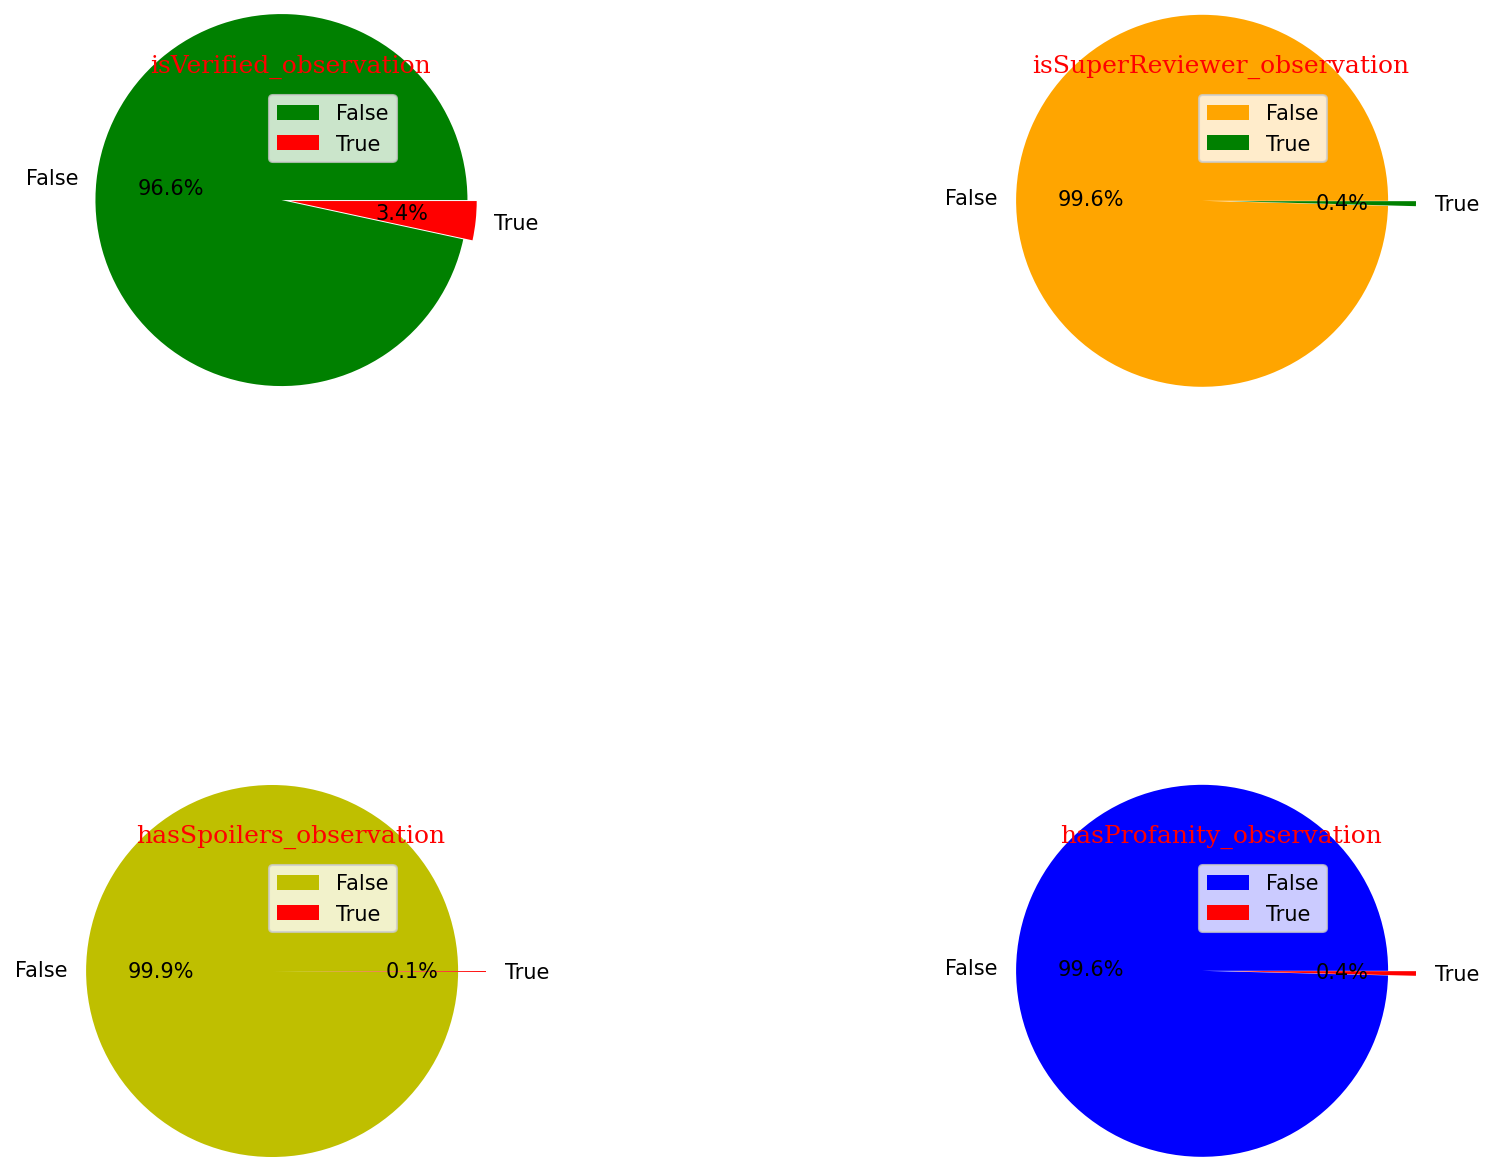

In [16]:
# make observation for this features : isVerified , isSuperReviewer ,hasSpoilers ,hasProfanity

# Font style for titles
f1 = {"family": "serif", "size": 12, "color": "r"}

# Create a figure with a specified size and DPI
plt.figure(figsize=(10, 10), dpi=150)

# Plot 1

isVerified = data1["isVerified"].value_counts()
plt.subplot(2, 2, 1)  # Create the first subplot
plt.pie(
    x=isVerified,
    labels=["False", "True"],
    colors=["g", "r"],
    explode=[0.1, 0],
    autopct='%1.1f%%',
    radius=2,
)
plt.title("isVerified_observation", fontdict=f1)
plt.legend()

# Plot 2
isSuperReviewer = data1["isSuperReviewer"].value_counts()
plt.subplot(2, 2, 2)  # Create the second subplot
plt.pie(
    x=isSuperReviewer,
    labels=["False", "True"],
    colors=["orange", "g"],
    explode=[0.2, 0.1],
    autopct='%1.1f%%',
    radius=2,
)
plt.title("isSuperReviewer_observation", fontdict=f1)
plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=2)



# Plot 3
hasSpoilers = data1["hasSpoilers"].value_counts()
plt.subplot(2, 2, 3)  # Create the second subplot
plt.pie(
    x=hasSpoilers,
    labels=["False", "True"],
    colors=["y", "r"],
    explode=[0.2, 0.1],
    autopct='%1.1f%%',
    radius=2,
)
plt.title("hasSpoilers_observation", fontdict=f1)
plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=3,hspace=1)



# plot 4:


hasProfanity = data1["hasProfanity"].value_counts()
plt.subplot(2, 2, 4)  # Create the second subplot
plt.pie(
    x=hasProfanity,
    labels=["False", "True"],
    colors=["b", "r"],
    explode=[0.2, 0.1],
    autopct='%1.1f%%',
    radius=2,
)
plt.title("hasProfanity_observation", fontdict=f1)
plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=3,hspace=1)

# Show the plot
plt.show()




array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'score'}>]], dtype=object)

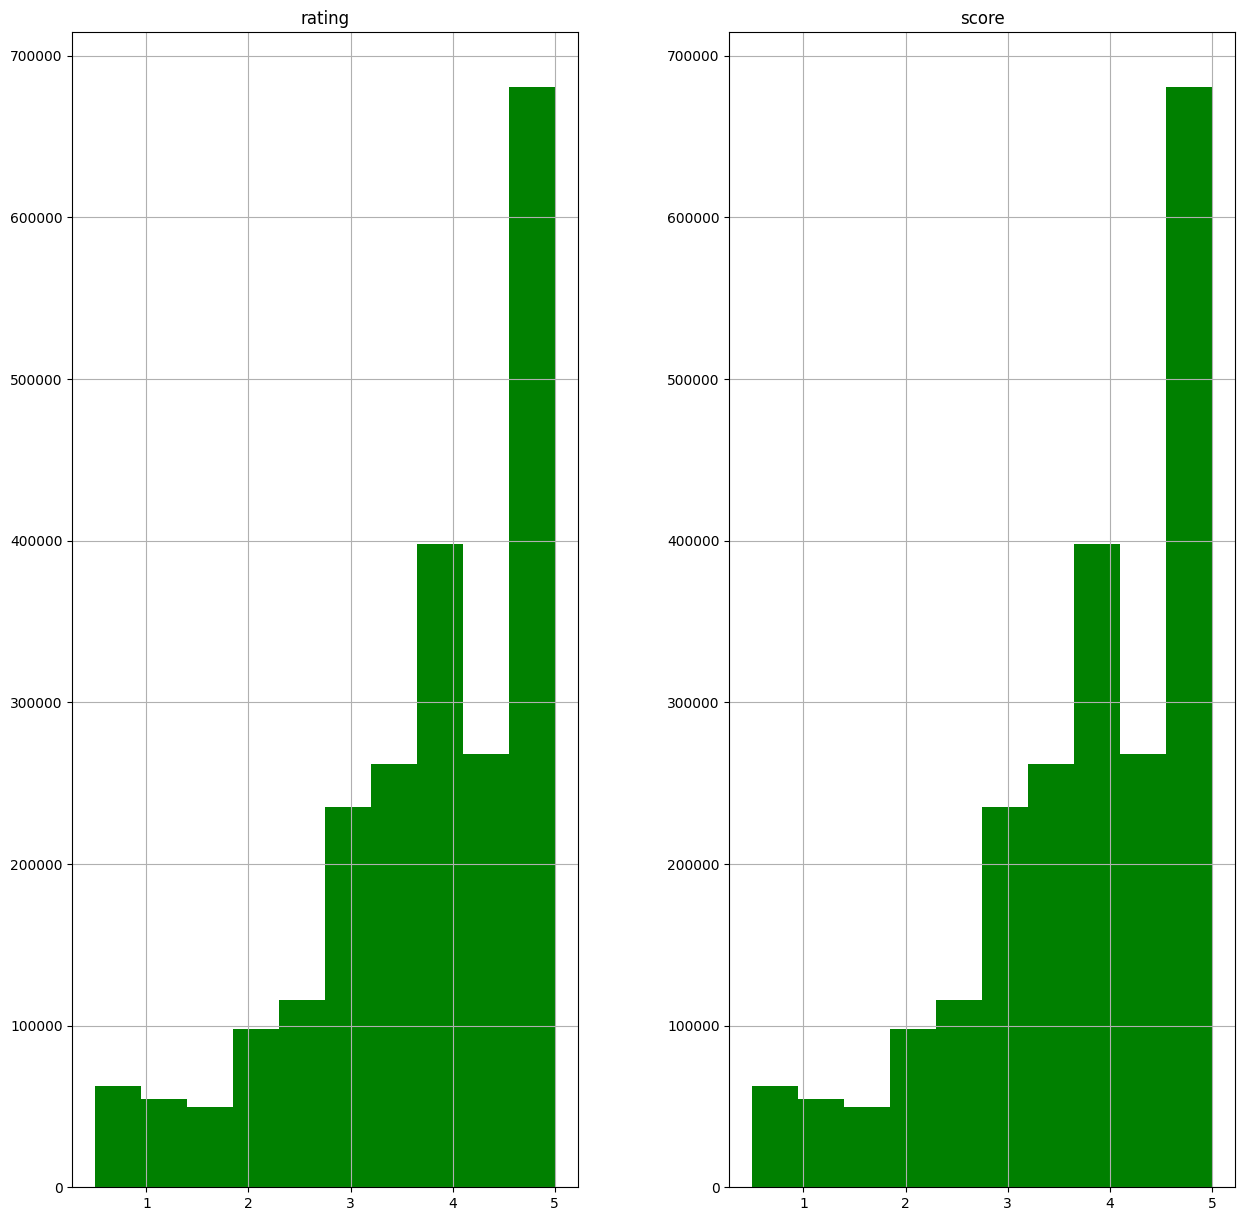

In [17]:
# plot hist to continous data :
data1.hist(figsize=(15,15),color="g")


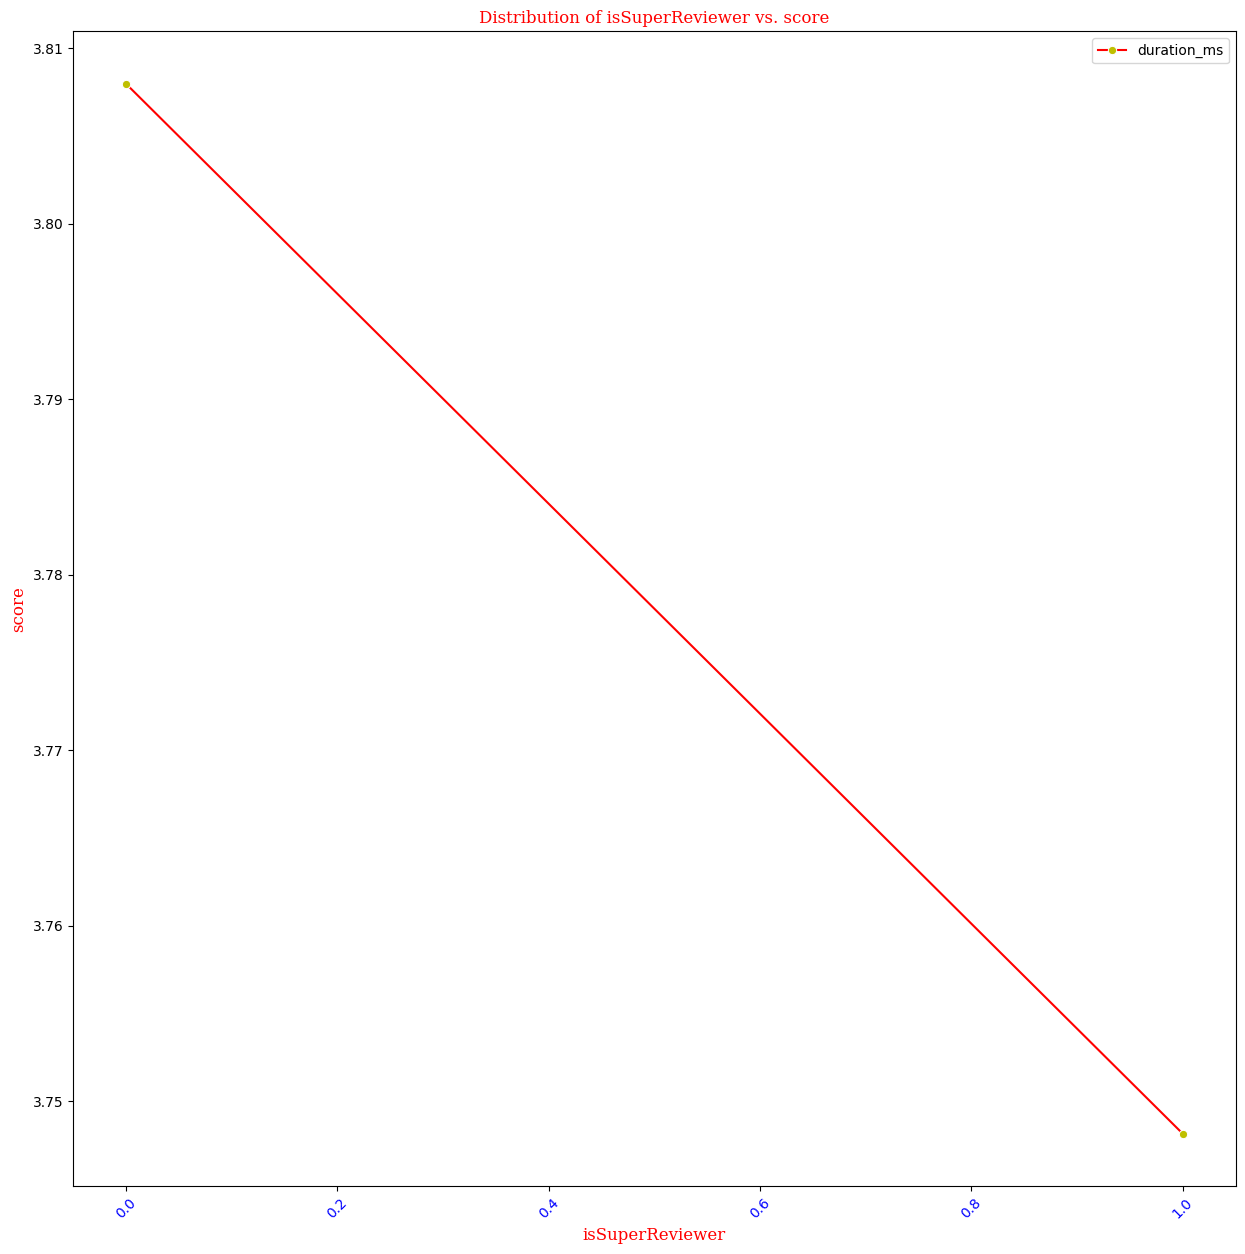

In [18]:
# oserve the isSuperReviewer vs. score:
plt.figure(figsize=(15,15))
plt.title("Distribution of isSuperReviewer vs. score",fontdict=f1)
top_10_popularity=data1.groupby("isSuperReviewer")["score"].mean().sort_values(ascending=True).iloc[:10]
sns.lineplot(x=top_10_popularity.index,y=top_10_popularity.values,color="r",label="duration_ms",marker="o",mfc="y")
plt.xticks(rotation=45,color="b")
plt.xlabel("isSuperReviewer",fontdict=f1)
plt.ylabel("score",fontdict=f1)
plt.show()

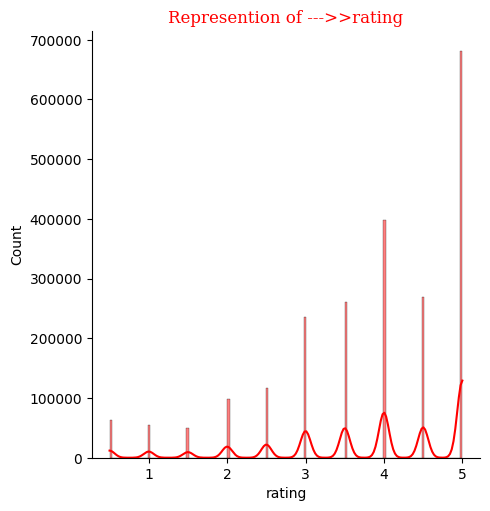

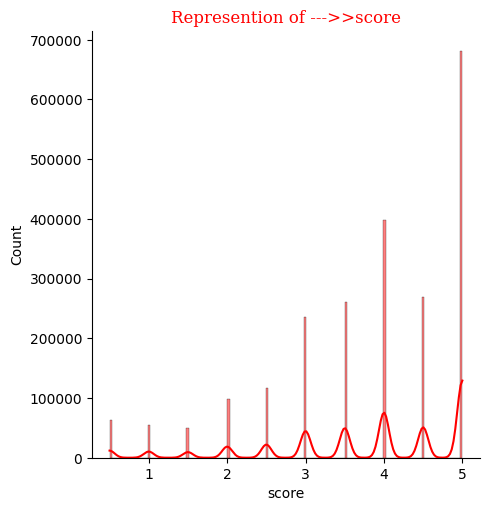

In [19]:
for col in data1.select_dtypes("number").columns:
    
    sns.displot(data1[col],kde=True,color="r",label=col)
    plt.title("Represention of --->>"+col,fontdict=f1)
        

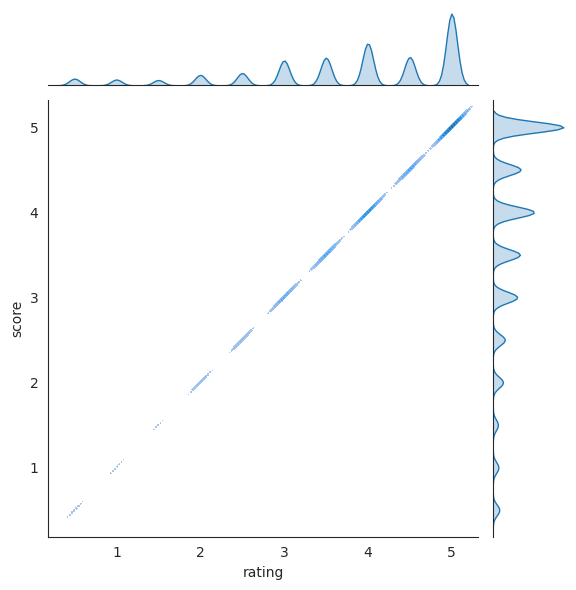

In [20]:
# plot the contor of data : : 
for col in data1.select_dtypes("number"):
    if col !="score":
       with sns.axes_style("white"):
          sns.jointplot(x=data1[col],y=data1["score"],kind="kde",fill=True)

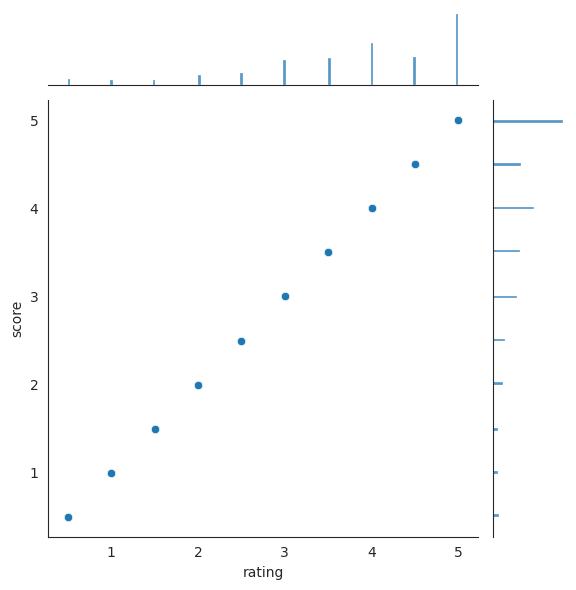

In [21]:
# plot the scatter of data:
for col in data1.select_dtypes("number"):
    if col !="score":
       with sns.axes_style("white"):
          sns.jointplot(x=data1[col],y=data1["score"],kind="scatter")

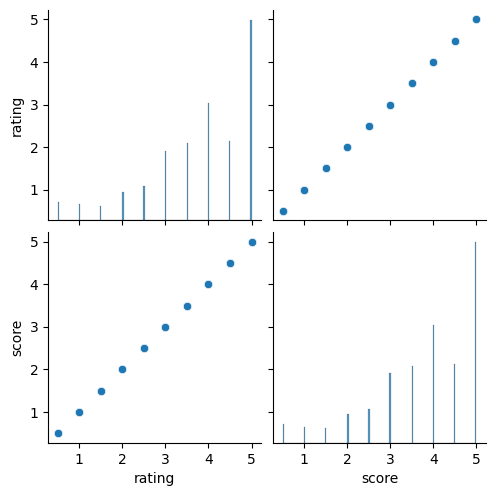

In [22]:
# observe the scatter of data :
sns.pairplot(data1.select_dtypes("number"))

/tmp/ipykernel_15274/4074647742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=userRealm.index,y=userRealm.values,color="r",label="userRealm",palette='coolwarm')


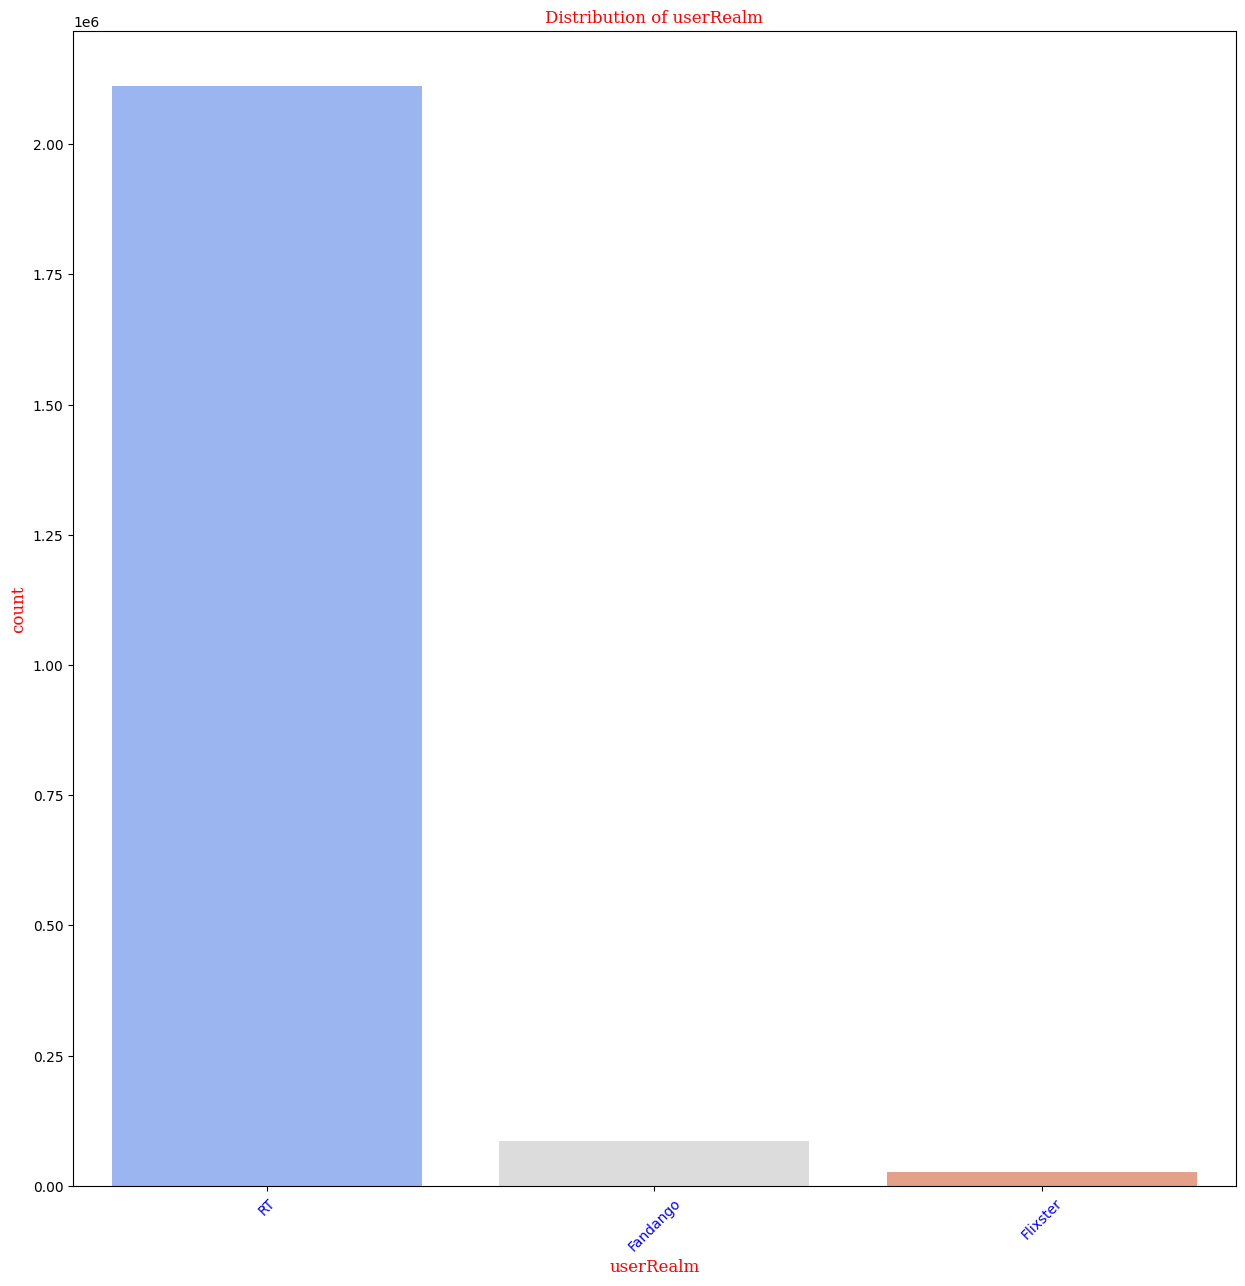

In [23]:
# oserve the userRealm distribution  :
plt.figure(figsize=(15,15))
plt.title("Distribution of userRealm",fontdict=f1)
userRealm=data1["userRealm"].value_counts()
sns.barplot(x=userRealm.index,y=userRealm.values,color="r",label="userRealm",palette='coolwarm')
plt.xticks(rotation=45,color="b")
plt.xlabel("userRealm",fontdict=f1)
plt.ylabel("count",fontdict=f1)
plt.show()

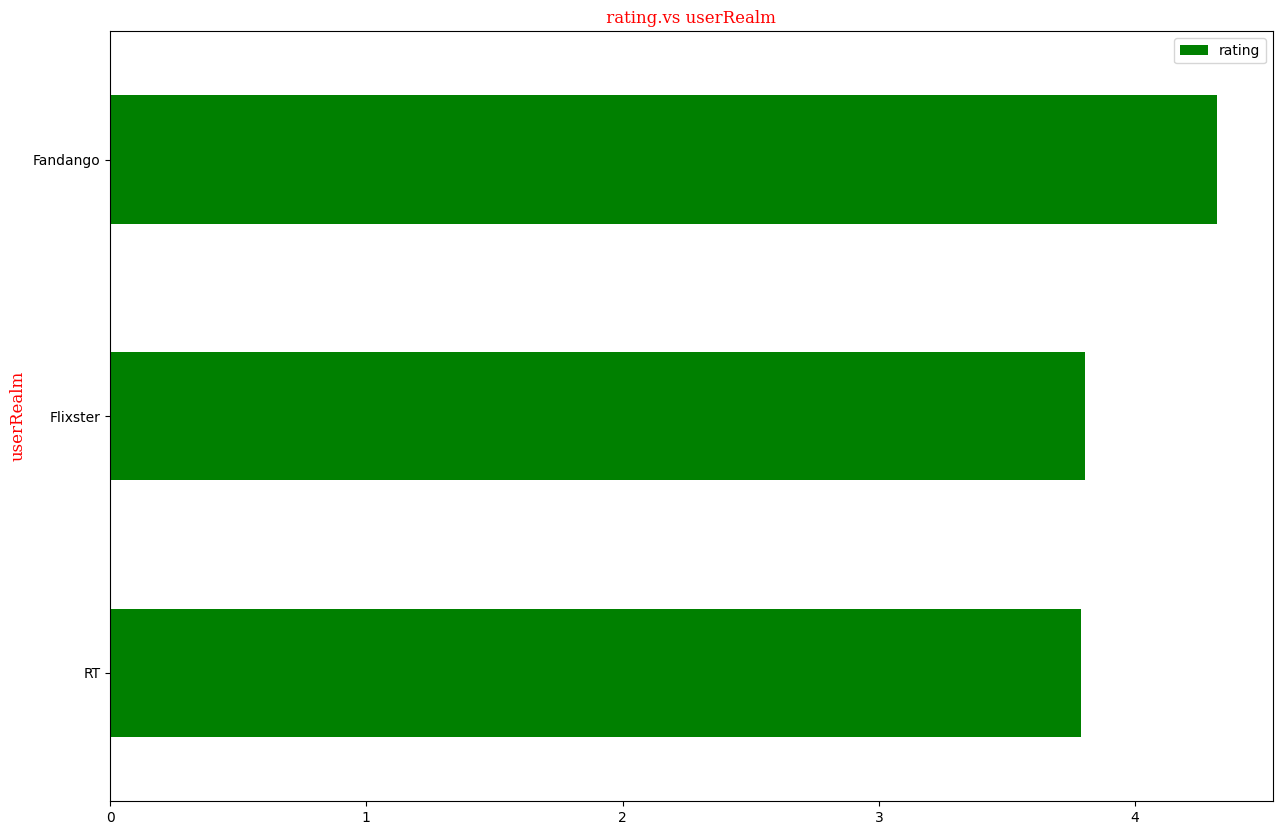

In [24]:
#observe the rating.vs userRealm distribution:
plt.figure(figsize=(15,10))
plt.title(" rating.vs userRealm ",fontdict=f1)
plt.xlabel("userRealm",fontdict=f1)
plt.ylabel("rating",fontdict=f1)
data1.groupby("userRealm")["rating"].mean().sort_values(ascending=True).plot(kind="barh",legend=True,color="g")
plt.show()

 ## Extract some statistical & the most important properties from the dataset:

In [25]:
# Calculate the correlation :
correlation=data1.select_dtypes("number").corr()
print(correlation)
print("-"*50)
spearman=data1.select_dtypes("number").corr(method="spearman")
print(spearman)
print("-"*50)
pearson=data1.select_dtypes("number").corr(method="pearson")
print(pearson)
print("-"*50)
kendall=data1.select_dtypes("number").corr(method="kendall")
print("kendall")

        rating  score
rating     1.0    1.0
score      1.0    1.0
--------------------------------------------------
        rating  score
rating     1.0    1.0
score      1.0    1.0
--------------------------------------------------
        rating  score
rating     1.0    1.0
score      1.0    1.0
--------------------------------------------------
kendall


/home/abdalrahman/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


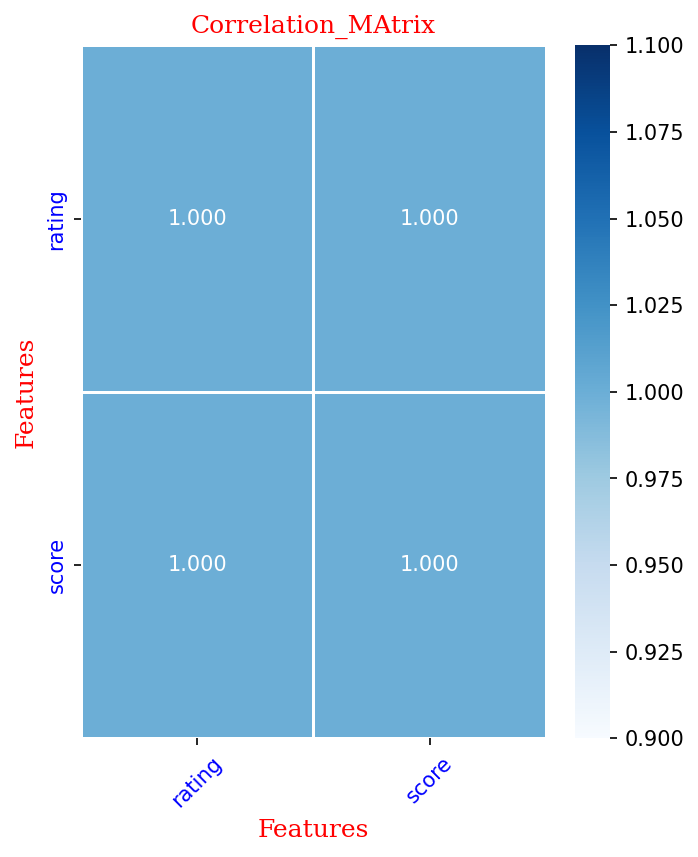

In [26]:
# Make Heatmap Correlation_matrix for all dataset:
plt.figure(figsize=(5,6),dpi=150)
plt.title("Correlation_MAtrix",fontdict=f1)
sns.heatmap(data1.select_dtypes("number").corr(),annot=True,fmt="0.3f",cmap='Blues',linewidths=0.5)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("Features",fontdict=f1)
plt.xticks(rotation=45,color="b")
plt.yticks(color="b",rotation=90)
plt.show()


In [27]:
# Extract the most important Numerical Features:
from sklearn.feature_selection import SelectKBest
fs=SelectKBest(score_func=f_classif,k=2)
fs.fit(data1.drop(columns="userRealm").select_dtypes("number").fillna(0),data1["userRealm"])


SelectKBest(k=2)

In [28]:
featurs_values=pd.DataFrame(fs.pvalues_)
features_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data1.drop(columns="userRealm").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([featurs_values,features_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,0.0,8291.147126,rating
1,0.0,8291.147126,score


In [29]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=2)
mic.fit(data1.drop(columns="userRealm").select_dtypes("number").fillna(0),data1["userRealm"])


SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7f005b5be790>)

In [30]:
features_MI_scores=pd.Series(mic.scores_,index=data1.drop(columns="userRealm").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

score     0.107532
rating    0.107625
dtype: float64

## preparing the dataset & Detecting the outliers :

In [31]:
# Convert All Categorical data into Numerical data:

label_encoder=LabelEncoder()
for col in data1.columns:
    data1[col]=label_encoder.fit_transform(data1[col])
data1.head(20)    

,rating,quote,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userRealm,userId
0,1,332628,0,0,0,0,1,0,2,1070614
1,8,1638559,0,0,0,0,8,1,2,1070667
2,6,1639599,0,0,0,0,6,2,2,1063900
3,3,169058,0,0,0,0,3,3,2,1063818
4,6,1725845,0,0,0,0,6,4,2,1064078
5,5,1063001,0,0,0,0,5,5,2,1066491
6,7,1639011,0,0,0,0,7,6,2,1064448
7,6,1639069,0,0,0,0,6,7,2,1064901
8,5,1639599,0,0,0,0,5,8,2,1063900
9,9,11844,0,0,0,0,9,9,2,1063913


In [32]:
# Handle the outliers on the ALL features:
#calc Q1,Q2,Q3,IQR and detect the outliers:
#calc the lower & upper limits :
#then there outlier in userRealm :
features=["rating","quote","isVerified","isSuperReviewer","hasSpoilers","hasProfanity","score","creationDate","userRealm","userId"]

for col in features:
    Q1_col,Q3_col=data1[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr 
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data1[col]: 
         if ((x> upper_limit) or (x<low_limit)): 
             outlier.append(x)           
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")
       
    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*80)

 * -- >> there No outlier in rating feature
Q1 of rating --->>> 5.0 
 Q3 of rating ---->>> 9.0 
 iqr--->>4.0
 low_limit--->>>-1.0 
  upper_limit--->>> 15.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
--------------------------------------------------------------------------------
 * -- >> there No outlier in quote feature
Q1 of quote --->>> 534325.5 
 Q3 of quote ---->>> 1610601.5 
 iqr--->>1076276.0
 low_limit--->>>-1080088.5 
  upper_limit--->>> 3225015.5 
 outlier---->>> [] 
 Number of outliers --->>> 0
--------------------------------------------------------------------------------
Ther outlier in this feature isVerified
Q1 of isVerified --->>> 0.0 
 Q3 of isVerified ---->>> 0.0 
 iqr--->>0.0
 low_limit--->>>0.0 
  upper_limit--->>> 0.0 
 outlier---->>> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [33]:
# Standardize the data

features=["rating","quote","isVerified","isSuperReviewer","hasSpoilers","hasProfanity","score","creationDate","userRealm","userId"]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data1[features]) 
x_scaled

array([[-2.34625548, -1.19524309, -0.18723539, ..., -1.35504947,
         0.2242747 ,  1.02019789],
       [ 0.57848664,  0.91777358, -0.18723539, ..., -1.35449012,
         0.2242747 ,  1.02033281],
       [-0.25715396,  0.91945631, -0.18723539, ..., -1.35393078,
         0.2242747 ,  1.00310656],
       ...,
       [-0.67497427, -0.06132323, -0.18723539, ...,  2.73880876,
         0.2242747 ,  1.72715894],
       [ 0.99630694,  0.50417159, -0.18723539, ...,  2.73880876,
         0.2242747 , -1.35497799],
       [-0.25715396,  0.58979859, -0.18723539, ...,  2.73880876,
         0.2242747 ,  1.62041321]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


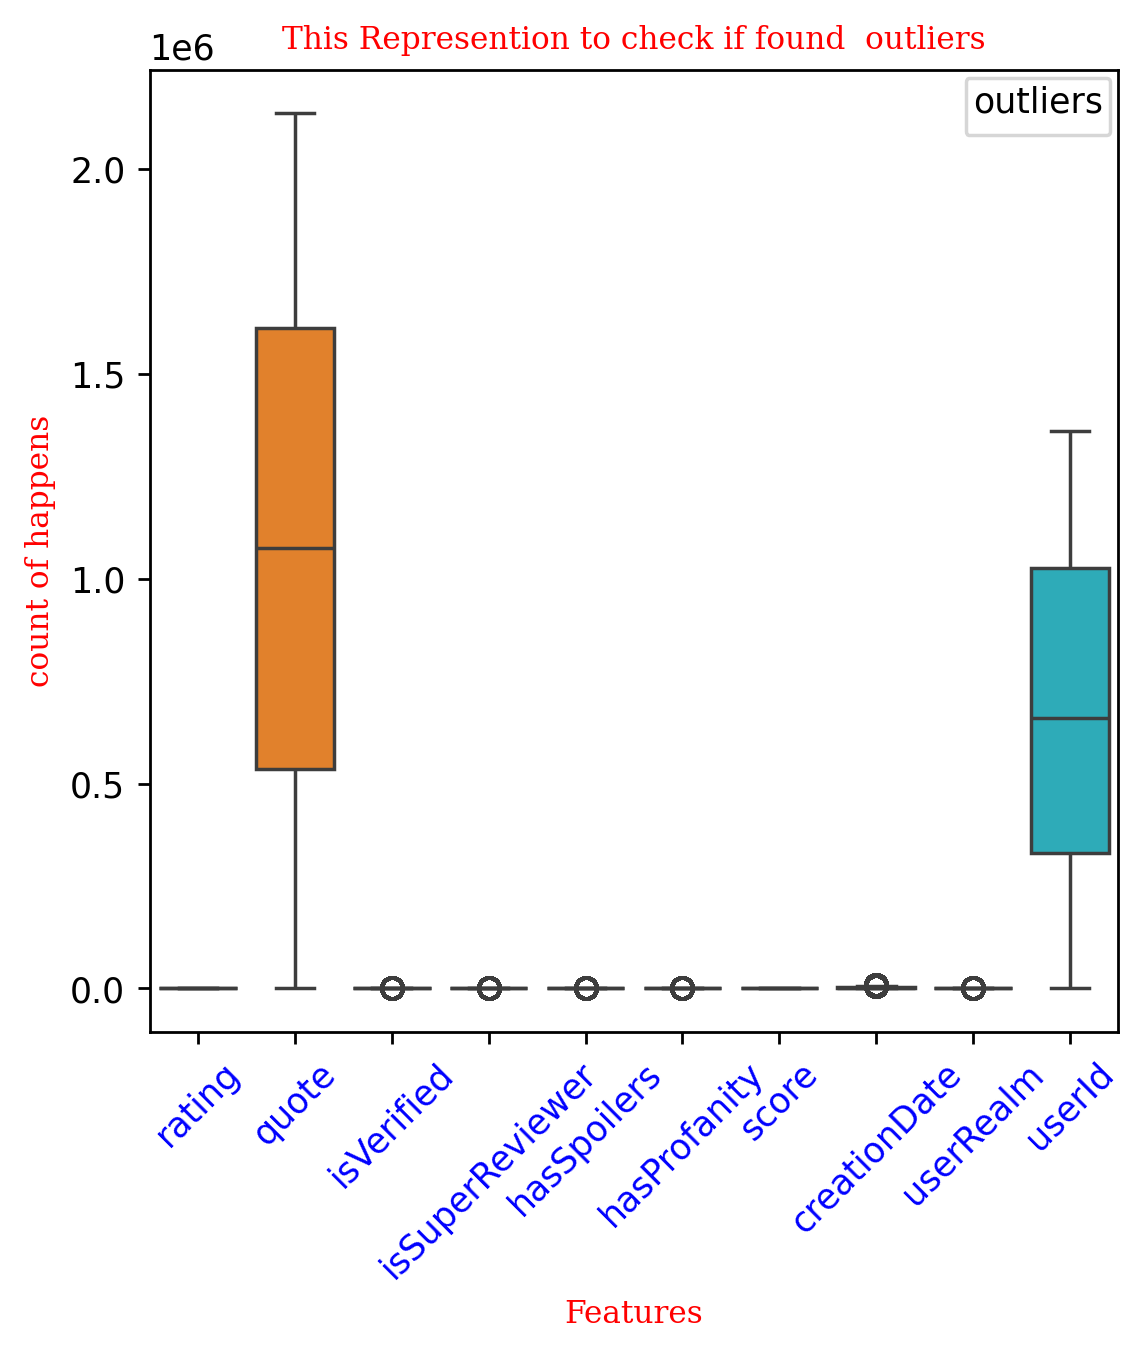

In [34]:
# from this Represention we discover that we found outlier in the  userRealm Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(5,5),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data1[features])
plt.legend(title="outliers",prop={'size': 5})

upper_limit :  3.1070075334951097
lower_limit :  0.7141032095070621
Mean Value :  1.910555371501086
Median Value :  2.0
1st Standard Deviation :  0.3988173873313413


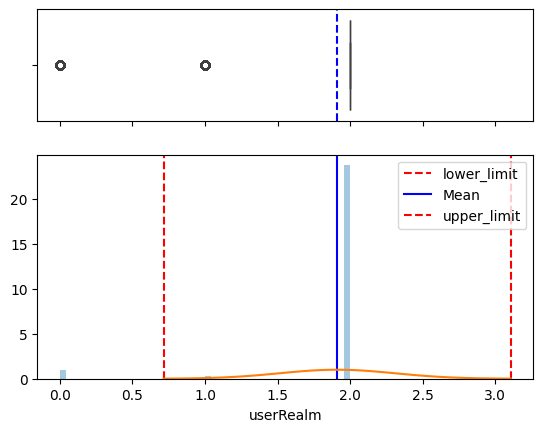

In [35]:
# there outlier in  userRealm feature :
# calculate upper ,lower ,mean ,std , meadian 

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data1.userRealm.mean()
std = data1.userRealm.std()
median = data1.userRealm.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data1["userRealm"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data1["userRealm"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [36]:
print("""
 # Here End of Analysis project ,Another file i will make as a seprate project .

 # Devloper : AbdalRahman Gameel Hebishy .

""")


 # Here End of Analysis project ,Another file i will make as a seprate project .

 # Devloper : AbdalRahman Gameel Hebishy .


